#### 11/15/2021
<a id='intro'></a>
## Introduction
This is a no-show appointments case study on the relation between the age of the patient and his health status and how it affects his showing up for their scheduled appointments?

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.
The medical appointments data is [here](https://www.kaggle.com/joniarroba/noshowappointments). 
The data consists of one CSV file, The file contains 14 columns and 110527 non-null rows including patient ID, appointment ID, scheduled and appointment days, personal information like gender, age, patient's neighborhood, membership in Bolsa Família, patient's health status like if the patient is alcoholic, diabetic or has hypertension or has a handicap and if the patient received an SMS message and if the patient showed up to the appointment or not.


### Question for Analysis

Does the age of the patient and his health status affect his showing up for their scheduled appointments?

## Set up the environment


In [1]:
# Set up the environment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

## Loading our data

In [2]:
# Loading data
no_show_appointments=pd.read_csv('/kaggle/input/noshowappointments/KaggleV2-May-2016.csv')


## Cleaning and processing data

First, start by renaming the column and removing misspelled words. And then exclude children who are less than 10 years old who are not responsible for their nonattendance and we did not have data about their parents. 

In [3]:
# rename the columns
no_show_appointments=no_show_appointments.rename(columns={"No-show": "No_show", "Handcap": "Handicap", "Hipertension": "Hypertension"})

# excluding children less than 10 years
no_show_appointments = no_show_appointments.query('Age > 10')


The following graph shows the patient not showing up to an appointment as yes, And no to the patient showing up to an appointment.

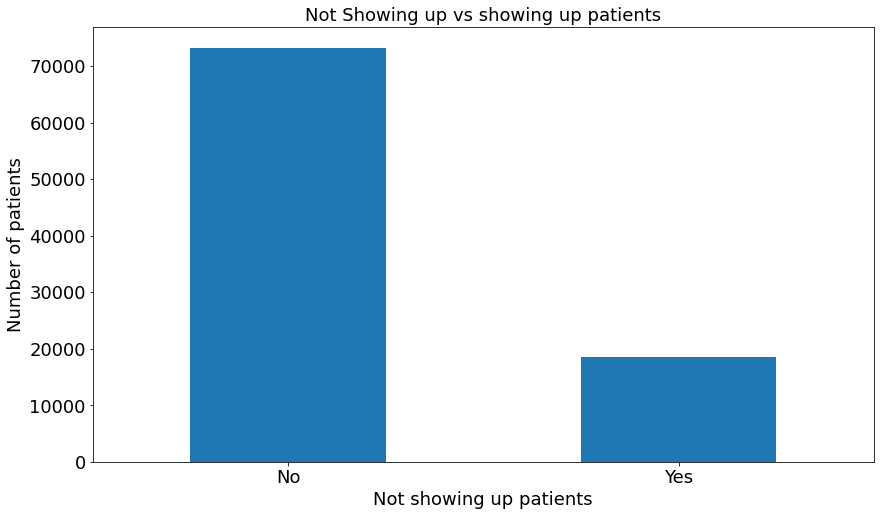

In [4]:
# showing up vs not showing up patients

fig,fg=plt.subplots(figsize=(14, 8))
no_show_appointments['No_show'].value_counts().plot(kind = 'bar', fontsize=18, rot=0)
fg.set_ylabel('Number of patients', fontsize=18)
fg.set_xlabel('Not showing up patients', fontsize=18)
fg.set_title('Not Showing up vs showing up patients', fontsize=18)
plt.show;

In [5]:
no_show_appointments['No_show'].value_counts()

No     73246
Yes    18531
Name: No_show, dtype: int64

The number of patients showing up is 73246 which is much higher than that of the not showing up patients which is 18531. 
these numbers include the patients that have both attended and non-attended certain appointments.

Now we need to split the data frame into two data frames attended and non attended according to the column No_show, So we extract non attended patients only by taking the outer join of the attended and non attended data frames which result in a 27 column data frame with null values in both attended and non attended data frames. We keep the null values only and exclude the rest as we do not need the intersection, Then split the data frame into new attended and non attended data frames which represent the attended and non attended patients each without intersection with the other one, Finally, clean the new data frame's column names and removing duplicates and NA values.

In [6]:
# split the data into attended and non attended

non_attended = no_show_appointments.query('No_show == "Yes"')
attended = no_show_appointments.query('No_show == "No"')

# taking the outer join of the attended and non attended dataframes
ds_union = pd.merge(non_attended, attended, how='outer', left_on='PatientId', right_on='PatientId',sort=True)

# keep the null values only and exclude the rest
ds_union = ds_union[ds_union.isnull().any(axis=1)]

# splitting the dataframe into new attended and non attended dataframes

non_attended = ds_union.iloc[:,:14]
attended = ds_union.iloc[:, np.r_[0,14:27]]

#cleaning column names

attended=attended.rename(columns = lambda x : str(x)[:-2])
attended=attended.rename(columns={"Patient": "PatientId"})
non_attended.columns = non_attended.columns.str.rstrip('_x')

#removing dublicates and na values

non_attended = ((non_attended.dropna()).drop_duplicates())
attended = ((attended.dropna()).drop_duplicates())

## Analysis

Start by viewing statistics about both attended and non_attended patients.

In [7]:
attended.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,5.549400e+04,5.549400e+04,55494.000000,55494.000000,55494.000000,55494.000000,55494.000000,55494.000000,55494.000000
mean,1.477974e+14,5.679408e+06,45.299726,0.088820,0.251901,0.089235,0.034328,0.026363,0.302537
std,2.560986e+14,7.227646e+04,19.494935,0.284487,0.434109,0.285085,0.182072,0.175461,0.459361
min,3.921784e+04,5.134220e+06,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.177425e+12,5.644543e+06,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.160493e+13,5.684838e+06,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.472719e+13,5.731580e+06,60.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,9.999686e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
non_attended.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,7.766000e+03,7.766000e+03,7766.000000,7766.000000,7766.000000,7766.000000,7766.000000,7766.000000,7766.000000
mean,1.495930e+14,5.640719e+06,39.569534,0.109580,0.186840,0.069663,0.034896,0.016353,0.450039
std,2.563013e+14,7.910955e+04,18.964005,0.312386,0.389808,0.254594,0.183527,0.139414,0.497530
min,5.628261e+06,5.122866e+06,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.323460e+12,5.598450e+06,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.295194e+13,5.644410e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.623847e+13,5.694508e+06,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.996585e+14,5.789979e+06,97.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


We see that the mean age of the non-attended patient is 39.6 years less than the attended patient which is 45.3.

Now let's split the non-attended patients into males and females, Also split the non-attended patients into diabetic and non-diabetic, alcoholic and non-alcoholic, and hypertension and no hypertension.

In [9]:
# split the non attended patients into males and females

female_non_attended = non_attended[non_attended['Gender'] == 'F']
male_non_attended = non_attended[non_attended['Gender'] == 'M']

# split the non attended patients into diabetic and non diabetic

diabetic_non_attended = non_attended.query('Diabetes == 1.0')
non_diabetic_non_attended = non_attended.query('Diabetes == 0.0')

# split the non attended patients into alcoholic and non_attended

alcoholic_non_attended = non_attended.query('Alcoholism == 1.0')
non_alcoholic_non_attended = non_attended.query('Alcoholism == 0.0')

# split the non attended patients into hypertension and no hypertension

hypertension_non_attended = non_attended.query('Hypertension == 1.0')
no_hypertension_non_attended = non_attended.query('Hypertension == 0.0')

Now it is time to view the relation between non-attended females and males.

In [10]:
# mean values of non attended females and males

print ('female non attended mean Age:',female_non_attended['Age'].mean(),'years')
print ('male non attended mean Age:',male_non_attended['Age'].mean(),'years')

female non attended mean Age: 39.8716796875 years
male non attended mean Age: 38.9848828420257 years


There is no big difference between the mean age between females and males not showing up. 
The following graph shows the relation between non-attended females and males with age.

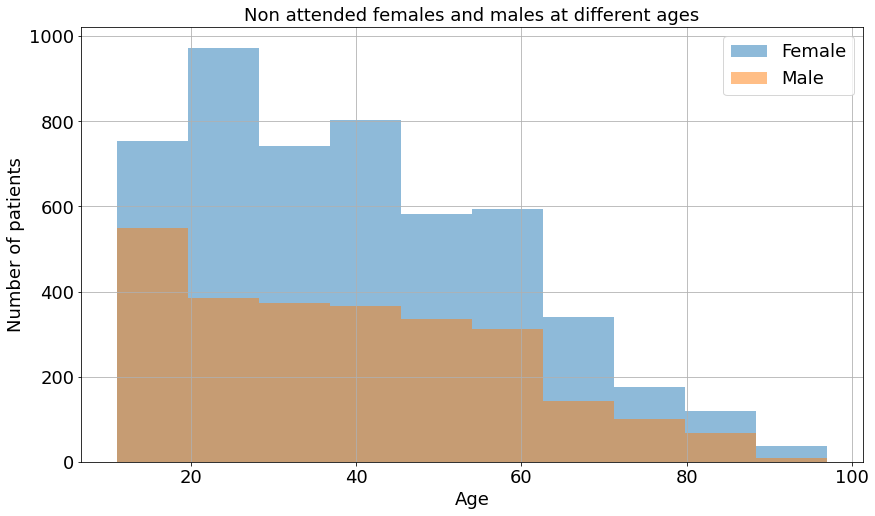

In [11]:
# non attended females and males with age graph

fig,fg=plt.subplots(figsize=(14, 8))
female_non_attended['Age'].hist(alpha = 0.5, label='Female')
male_non_attended['Age'].hist(alpha = 0.5, label='Male')
fg.legend(loc='upper right', fontsize=18)
fg.set_ylabel('Number of patients', fontsize=18)
fg.set_xlabel('Age', fontsize=18)
fg.set_title('Non attended females and males at different ages', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

As you can see the figure does not shows a different pattern between males and females, It is clear in both males and females that the number of patients not attended is high in teenagers then decreases with increasing age.

The following figure demonstrates an important aspect of the effect of hypertension and diabetes on the patient not showing up to an appointment.

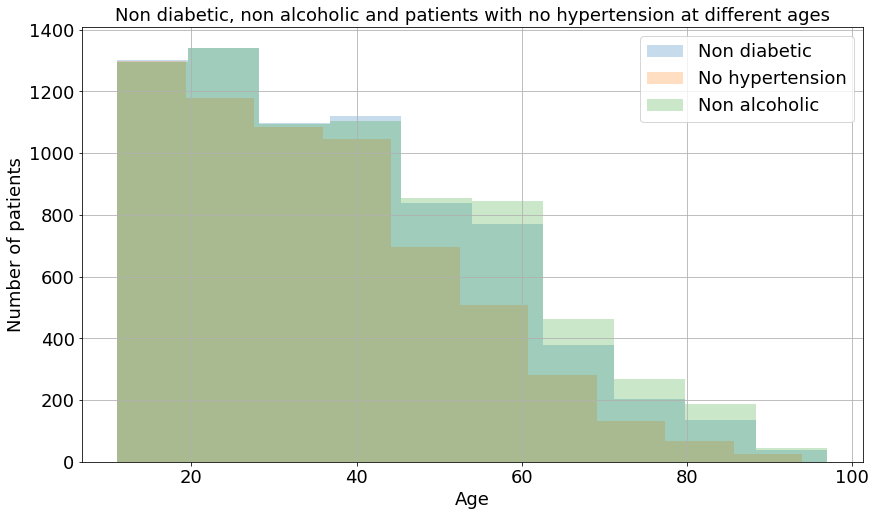

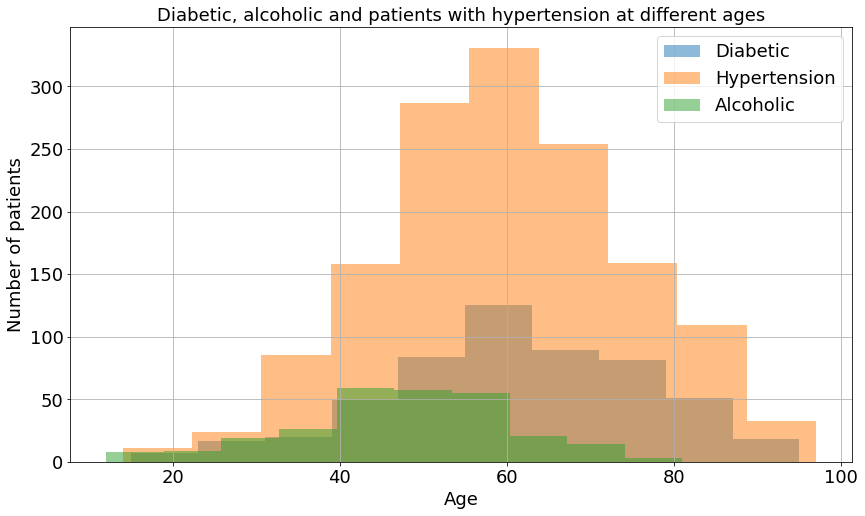

In [12]:
# non diabetic, non alcoholic and patients with no hypertension graph

fig,fg=plt.subplots(figsize=(14, 8))
non_diabetic_non_attended['Age'].hist(alpha = 0.25, label='Non diabetic')
no_hypertension_non_attended['Age'].hist(alpha = 0.25, label='No hypertension')
non_alcoholic_non_attended['Age'].hist(alpha = 0.25, label='Non alcoholic')
fg.legend(loc='upper right', fontsize=18)
fg.set_ylabel('Number of patients', fontsize=18)
fg.set_xlabel('Age', fontsize=18)
fg.set_title('Non diabetic, non alcoholic and patients with no hypertension at different ages', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# diabetic, alcoholic and patients with hypertension graph

fig1,fg1=plt.subplots(figsize=(14, 8))
diabetic_non_attended['Age'].hist(alpha = 0.5, label='Diabetic')
hypertension_non_attended['Age'].hist(alpha = 0.5, label='Hypertension')
alcoholic_non_attended['Age'].hist(alpha = 0.5, label='Alcoholic')
fg1.legend(loc='upper right', fontsize=18)
fg1.set_ylabel('Number of patients', fontsize=18)
fg1.set_xlabel('Age', fontsize=18)
fg1.set_title('Diabetic, alcoholic and patients with hypertension at different ages', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()


In [13]:
print ('Non diabetic mean Age:',non_diabetic_non_attended['Age'].mean(),'years')
print ('No hypertension mean Age:',no_hypertension_non_attended['Age'].mean(),'years')
print ('Non alcoholic mean Age:',non_alcoholic_non_attended['Age'].mean(),'years')

Non diabetic mean Age: 38.00553633217993 years
No hypertension mean Age: 34.9230403800475 years
Non alcoholic mean Age: 39.2837891927952 years


In [14]:
print ('Diabetic mean Age:',diabetic_non_attended['Age'].mean(),'years')
print ('Hypertension mean Age:',hypertension_non_attended['Age'].mean(),'years')
print ('Alcoholic mean Age:',alcoholic_non_attended['Age'].mean(),'years')

Diabetic mean Age: 60.45656192236599 years
Hypertension mean Age: 59.79186767746382 years
Alcoholic mean Age: 47.47232472324723 years


As most of the patients are non-diabetic, non-alcoholic, and have no hypertension, The overall behavior affects the male/female graph with age shown above, But the patients with hypertension or the diabetic or alcoholic patients show a different pattern, The diabetic/alcoholic/hypertension non attended teenage patients are small in numbers then the number of patients with the mentioned health conditions increases significantly passing by midlife age and reaches its peak at the age of retirement and then decreases with aging.

### Limitations

I have a little concern about the diabetic and alcoholic patients' representation of the population.

In [15]:
print ('Percentage of non attended diabetic patient:',round(100*sum(non_attended['Diabetes']) / non_attended['PatientId'].count() , 2),'%')
print ('Percentage of non attended alcoholic patient:',round(100*sum(non_attended['Alcoholism']) / non_attended['PatientId'].count() , 2),'%')
print ('Non attended Patients mean age:',round(non_attended['Age'].mean() , 2), 'years')

Percentage of non attended diabetic patient: 6.97 %
Percentage of non attended alcoholic patient: 3.49 %
Non attended Patients mean age: 39.57 years


As you can see from the previous percentages that diabetic and alcoholic patients have a very low representation of the population, This seems to be natural, however, the average age of non-diabetic and non-alcoholic patients is 38.01 and 39.28 years respectively, Compared to diabetic and alcoholic patients which are 60.46 and 47.47 years, This shifts the overall average age of non attended patients to 39.57 years. So it is better to get more data about diabetic and alcoholic patients as it has a great impact on the overall average age of non-attended patients. 

###  So to conclude:

- As most of the patients are non-diabetic, non-alcoholic, and have no hypertension, The overall behavior affects the overall mean age of the non-attended patients, making the average of the non-attended patient's age is 39.6 years which is less than attended patient is 45.3.

- The diabetic/alcoholic/hypertension non attended teenage patients number are small then the number of patients increases significantly passing by midlife age and reaching the retirement age and then decreases with aging.

- So the age of the patient and his health status (diabetic, alcoholic, and hypertension) are related to each other, The health status mentioned results in increasing levels of patients not showing up for the scheduled appointments.